# Preparation & Data exploration

In [729]:
! pip install category_encoders --quiet

In [730]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import category_encoders as ce

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTENC

In [731]:
DIR_PATH = "/content/drive/MyDrive/Colab Notebooks/ML CCC"

RANDOM_STATE = 42

In [732]:
X_train = pd.read_csv(os.path.join(DIR_PATH, 'X_train.csv'))
X_test = pd.read_csv(os.path.join(DIR_PATH, 'X_test.csv'))
y_train = pd.read_csv(os.path.join(DIR_PATH, 'y_train.csv'))
y_test = pd.read_csv(os.path.join(DIR_PATH, 'y_test.csv'))

In [733]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

In [734]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8252 entries, 0 to 8251
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8252 non-null   int64  
 1   Own_car          8252 non-null   int64  
 2   Own_property     8252 non-null   int64  
 3   Work_phone       8252 non-null   int64  
 4   Phone            8252 non-null   int64  
 5   Email            8252 non-null   int64  
 6   Unemployed       8252 non-null   int64  
 7   Num_children     8252 non-null   int64  
 8   Num_family       8252 non-null   int64  
 9   Account_length   8252 non-null   int64  
 10  Total_income     8252 non-null   float64
 11  Age              8252 non-null   float64
 12  Years_employed   8252 non-null   float64
 13  Income_type      8252 non-null   object 
 14  Education_type   8252 non-null   object 
 15  Family_status    8252 non-null   object 
 16  Housing_type     8252 non-null   object 
 17  Occupation_typ

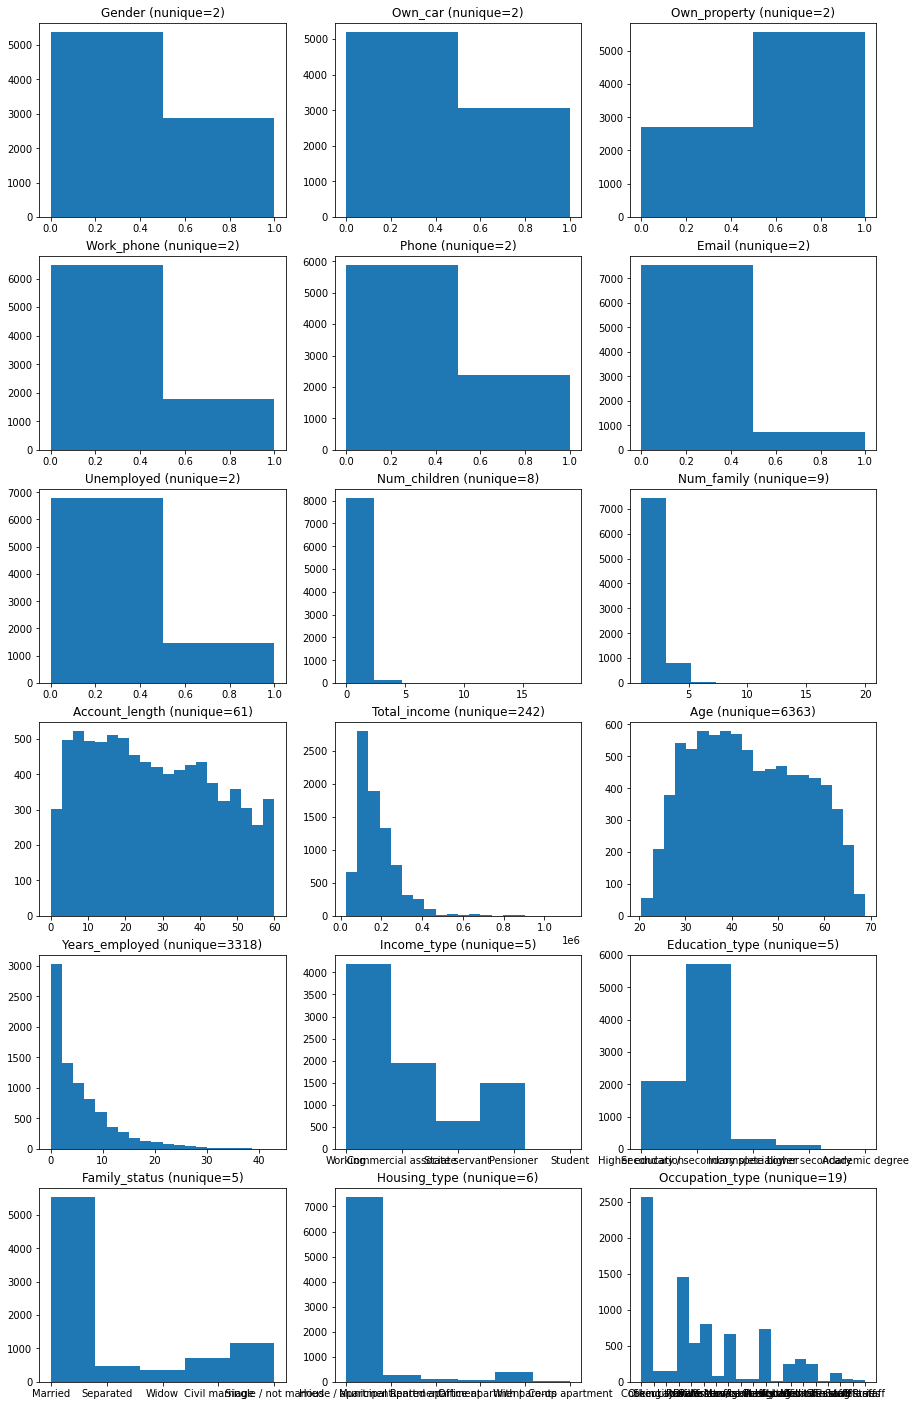

In [735]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [736]:
CATEGORICAL_COL_NAMES = ['Income_type', 'Education_type', 'Family_status',
                         'Housing_type', 'Occupation_type']
for col_name in CATEGORICAL_COL_NAMES:
    print(X_train[col_name].value_counts())
    print()

Working                 4193
Commercial associate    1951
Pensioner               1482
State servant            624
Student                    2
Name: Income_type, dtype: int64

Secondary / secondary special    5720
Higher education                 2113
Incomplete higher                 312
Lower secondary                   104
Academic degree                     3
Name: Education_type, dtype: int64

Married                 5544
Single / not married    1162
Civil marriage           709
Separated                487
Widow                    350
Name: Family_status, dtype: int64

House / apartment      7383
With parents            375
Municipal apartment     271
Rented apartment        125
Office apartment         67
Co-op apartment          31
Name: Housing_type, dtype: int64

Other                    2565
Laborers                 1452
Sales staff               804
Core staff                738
Managers                  666
Drivers                   532
High skill tech staff     319
Acco

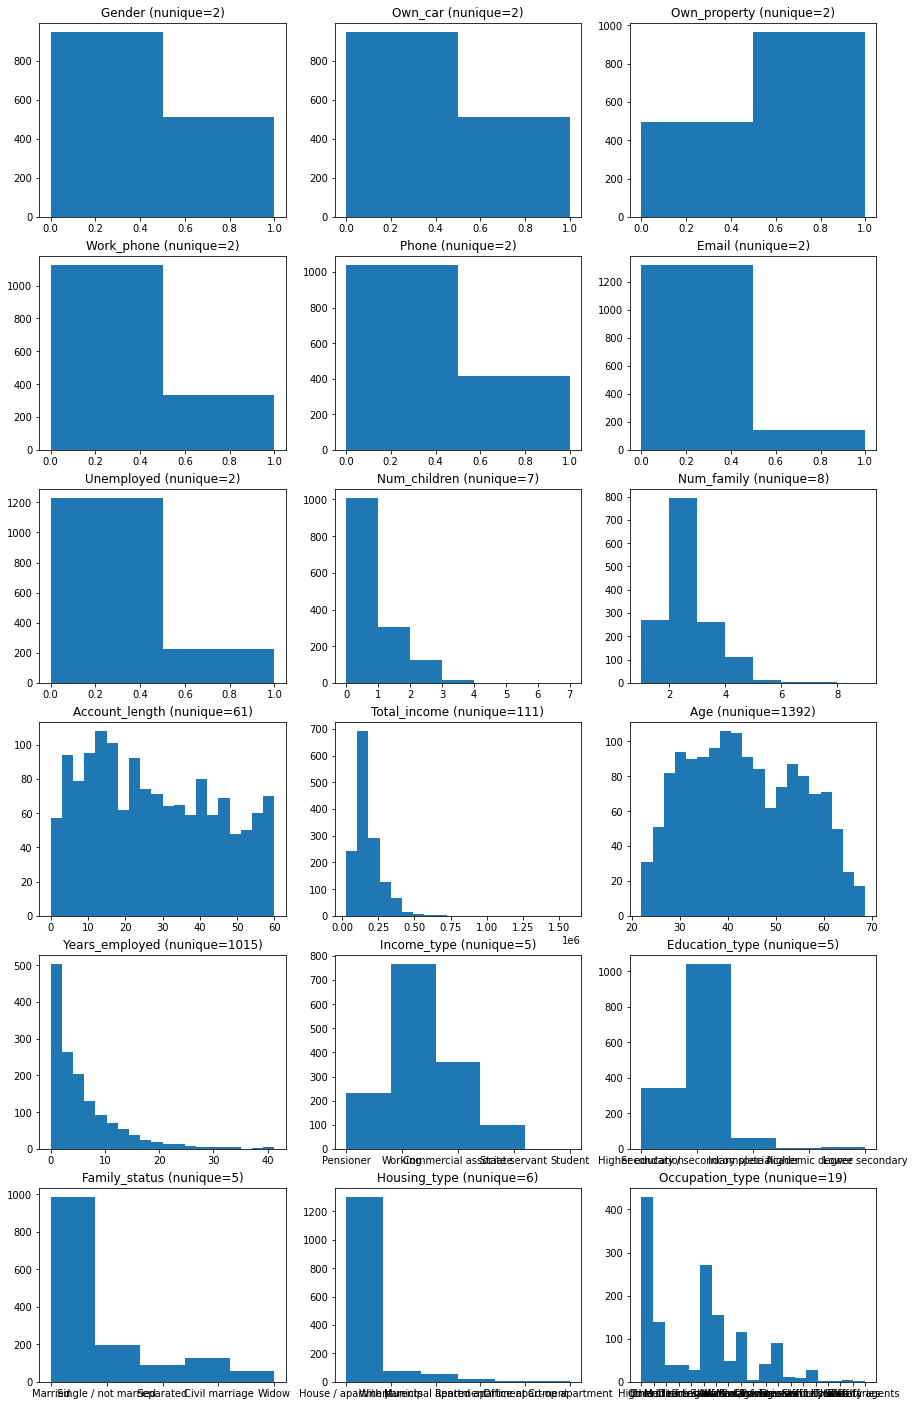

In [737]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_test):
    column = X_test[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [738]:
X_train.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,0,0,1,0,0,0,0,0,2,59,202500.0,31.409269,1.631793,Working,Higher education,Married,House / apartment,Other
1,0,1,1,0,0,0,0,1,3,59,130500.0,38.746860,15.222763,Working,Secondary / secondary special,Married,House / apartment,Cooking staff
2,1,0,0,1,1,0,0,1,3,6,180000.0,39.428599,2.680411,Commercial associate,Secondary / secondary special,Married,House / apartment,Security staff
3,1,0,1,0,0,0,0,1,2,1,99000.0,40.208902,0.793993,Working,Secondary / secondary special,Separated,House / apartment,Laborers
4,0,0,1,0,0,0,0,3,5,42,179100.0,36.255365,5.002156,State servant,Secondary / secondary special,Married,House / apartment,Cooking staff


In [739]:
X_train.shape

(8252, 18)

(array([7162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

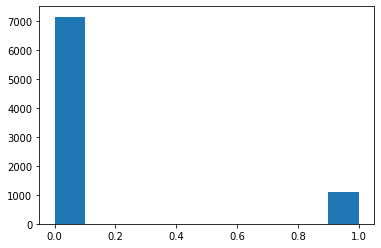

In [740]:
plt.hist(y_train)

# encode education type


In [741]:
education_type_map = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}
X_train['Education_type'] = X_train['Education_type'].map(education_type_map)

In [742]:
X_test['Education_type'] = X_test['Education_type'].map(education_type_map)

## power transform
edu type

In [743]:
X_train_filtered = X_train.loc[:, 'Education_type'].to_frame()
X_train_filtered

,Education_type
0,4
1,2
2,2
3,2
4,2
...,...
8247,3
8248,2
8249,2
8250,2


In [744]:
transformer = PowerTransformer()
X_train_filtered_transformed = transformer.fit_transform(X_train_filtered)

In [745]:
X_train.loc[:, 'Education_type'] = X_train_filtered_transformed

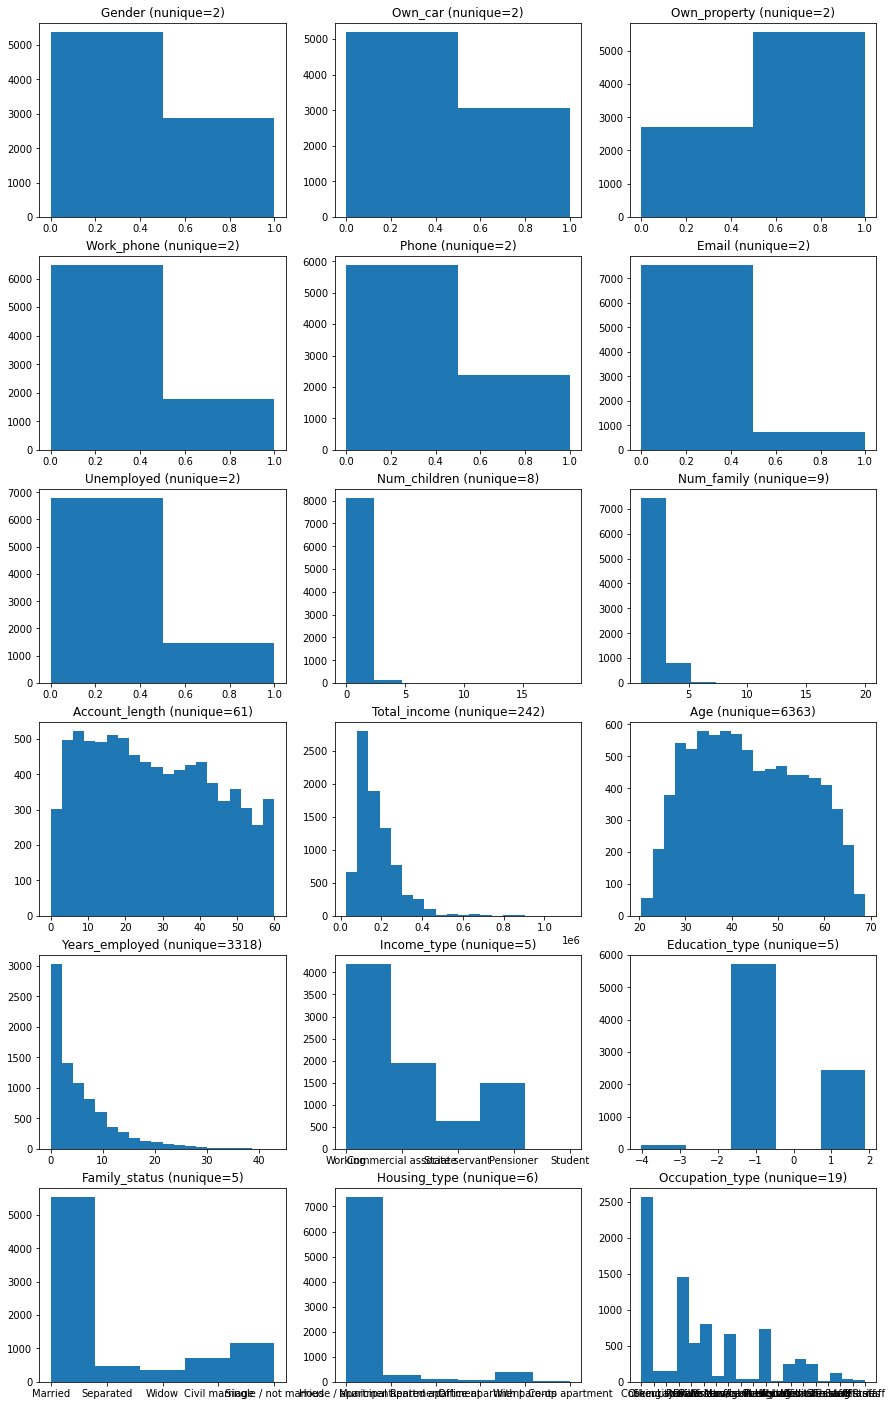

In [746]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [747]:
X_train.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,0,0,1,0,0,0,0,0,2,59,202500.0,31.409269,1.631793,Working,1.501272,Married,House / apartment,Other
1,0,1,1,0,0,0,0,1,3,59,130500.0,38.746860,15.222763,Working,-0.527669,Married,House / apartment,Cooking staff
2,1,0,0,1,1,0,0,1,3,6,180000.0,39.428599,2.680411,Commercial associate,-0.527669,Married,House / apartment,Security staff
3,1,0,1,0,0,0,0,1,2,1,99000.0,40.208902,0.793993,Working,-0.527669,Separated,House / apartment,Laborers
4,0,0,1,0,0,0,0,3,5,42,179100.0,36.255365,5.002156,State servant,-0.527669,Married,House / apartment,Cooking staff


In [748]:
X_test_filtered_transformed = transformer.transform(
    X_test.loc[:, 'Education_type'].to_frame())

In [749]:
X_test.loc[:, 'Education_type'] = X_test_filtered_transformed

#power transform
Num_children to Years_employed   

In [750]:
X_train_filtered = X_train.loc[:, 'Num_children':'Years_employed']
X_train_filtered

,Num_children,Num_family,Account_length,Total_income,Age,Years_employed
0,0,2,59,202500.0,31.409269,1.631793
1,1,3,59,130500.0,38.746860,15.222763
2,1,3,6,180000.0,39.428599,2.680411
3,1,2,1,99000.0,40.208902,0.793993
4,3,5,42,179100.0,36.255365,5.002156
...,...,...,...,...,...,...
8247,0,2,2,225000.0,31.803528,9.155561
8248,0,2,51,202500.0,40.277350,17.591053
8249,0,2,37,157500.0,64.789831,0.000000
8250,1,3,53,225000.0,41.769509,23.721226


In [751]:
transformer = PowerTransformer()
X_train_filtered_transformed = transformer.fit_transform(X_train_filtered)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [752]:
X_train.loc[:, 'Num_children':'Years_employed'] = X_train_filtered_transformed

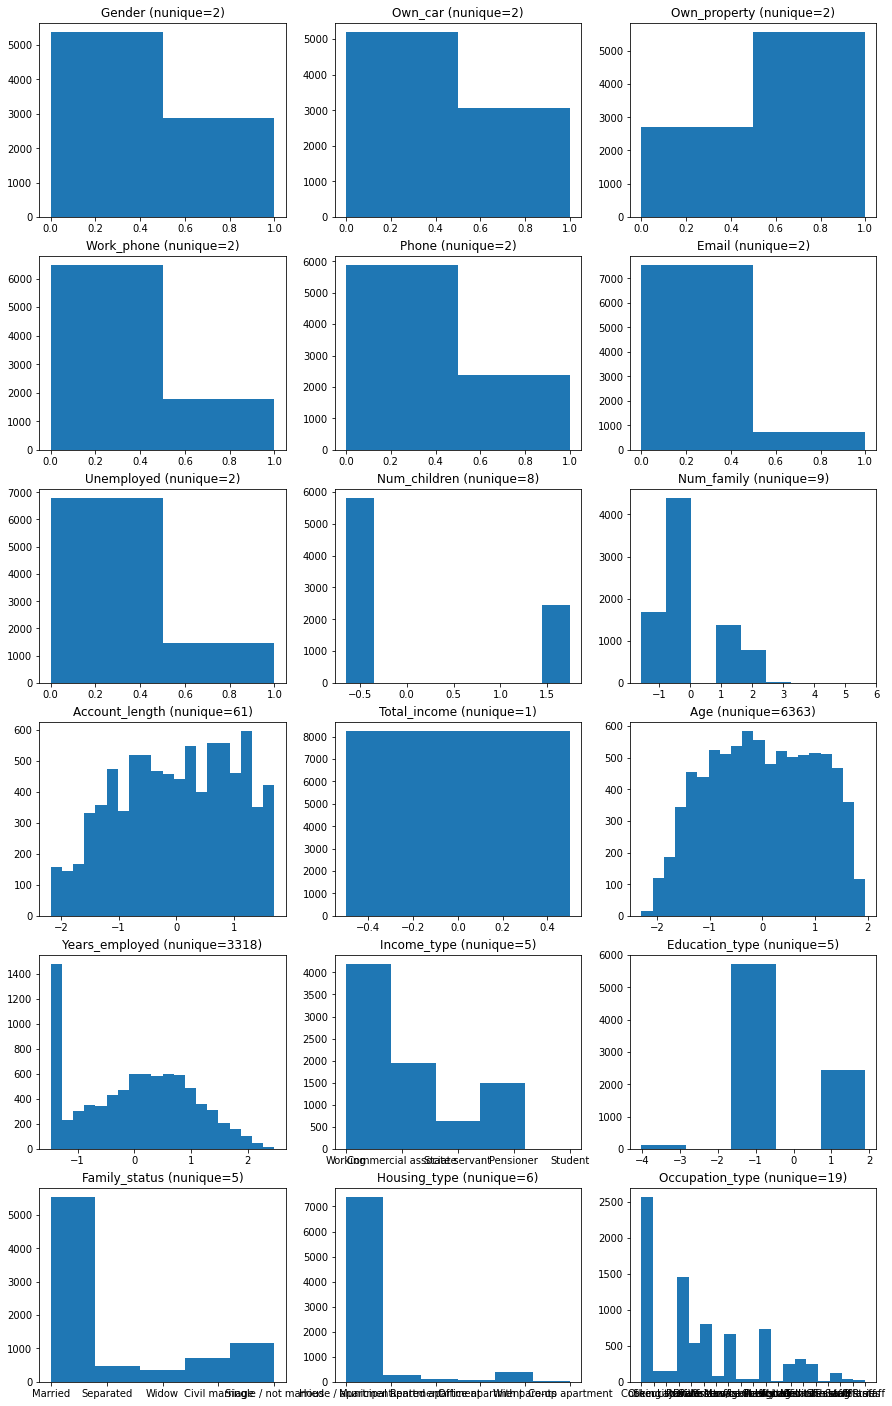

In [753]:
fig, axs = plt.subplots(6, 3, figsize=(15, 25))

for i, column_name in enumerate(X_train):
    column = X_train[column_name]
    nunique = column.nunique()

    axs[i//3, i%3].hist(column, bins=min(nunique, 20))
    axs[i//3, i%3].set_title(f'{column_name} (nunique={nunique})')

In [754]:
X_test_filtered_transformed = transformer.transform(
    X_test.loc[:, 'Num_children':'Years_employed'])

In [755]:
X_test.loc[:, 'Num_children':'Years_employed'] = X_test_filtered_transformed

# SMOTENC

In [756]:
X_test.iloc[:, 13:18]

,Income_type,Education_type,Family_status,Housing_type,Occupation_type
0,Pensioner,1.501272,Married,House / apartment,Other
1,Working,-0.527669,Married,House / apartment,Core staff
2,Pensioner,-0.527669,Single / not married,House / apartment,Other
3,Pensioner,-0.527669,Married,House / apartment,Other
4,Working,-0.527669,Single / not married,House / apartment,Other
...,...,...,...,...,...
1452,State servant,1.501272,Separated,House / apartment,Medicine staff
1453,Working,-0.527669,Married,House / apartment,Other
1454,Commercial associate,1.501272,Married,Rented apartment,Accountants
1455,Commercial associate,-0.527669,Married,House / apartment,High skill tech staff


In [757]:
smote = SMOTENC(#sampling_strategy={0: 10000, 1:10000},
              #sampling_strategy=0.5,
              categorical_features=list(range(13, 18)),
              random_state=RANDOM_STATE)
X_train, y_train_over = smote.fit_resample(X_train, y_train)  

In [758]:
'''smote = SMOTE(#sampling_strategy={0: 10000, 1:10000},
              #sampling_strategy=0.5,
              random_state=RANDOM_STATE)
X_train, y_train_over = smote.fit_resample(X_train, y_train)  '''

'smote = SMOTE(#sampling_strategy={0: 10000, 1:10000},\n              #sampling_strategy=0.5,\n              random_state=RANDOM_STATE)\nX_train, y_train_over = smote.fit_resample(X_train, y_train)  '

In [759]:
'''adasyn = ADASYN(
    # sampling_strategy={0: 10000, 1:10000},
    #sampling_strategy=0.5,
    random_state=RANDOM_STATE
)
X_train, y_train_over = adasyn.fit_resample(X_train, y_train)'''

'adasyn = ADASYN(\n    # sampling_strategy={0: 10000, 1:10000},\n    #sampling_strategy=0.5,\n    random_state=RANDOM_STATE\n)\nX_train, y_train_over = adasyn.fit_resample(X_train, y_train)'

# ONE HOT

In [760]:
enc = ce.one_hot.OneHotEncoder()

In [761]:
X_train = enc.fit_transform(X_train, y_train_over)

In [762]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14324 entries, 0 to 14323
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              14324 non-null  int64  
 1   Own_car             14324 non-null  int64  
 2   Own_property        14324 non-null  int64  
 3   Work_phone          14324 non-null  int64  
 4   Phone               14324 non-null  int64  
 5   Email               14324 non-null  int64  
 6   Unemployed          14324 non-null  int64  
 7   Num_children        14324 non-null  float64
 8   Num_family          14324 non-null  float64
 9   Account_length      14324 non-null  float64
 10  Total_income        14324 non-null  float64
 11  Age                 14324 non-null  float64
 12  Years_employed      14324 non-null  float64
 13  Income_type_1       14324 non-null  int64  
 14  Income_type_2       14324 non-null  int64  
 15  Income_type_3       14324 non-null  int64  
 16  Inco

In [763]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1457 non-null   int64  
 1   Own_car          1457 non-null   int64  
 2   Own_property     1457 non-null   int64  
 3   Work_phone       1457 non-null   int64  
 4   Phone            1457 non-null   int64  
 5   Email            1457 non-null   int64  
 6   Unemployed       1457 non-null   int64  
 7   Num_children     1457 non-null   float64
 8   Num_family       1457 non-null   float64
 9   Account_length   1457 non-null   float64
 10  Total_income     1457 non-null   float64
 11  Age              1457 non-null   float64
 12  Years_employed   1457 non-null   float64
 13  Income_type      1457 non-null   object 
 14  Education_type   1457 non-null   float64
 15  Family_status    1457 non-null   object 
 16  Housing_type     1457 non-null   object 
 17  Occupation_typ

In [764]:
X_test = enc.transform(X_test, y_test)

# RF

In [765]:
rf = RandomForestClassifier(n_estimators=50, 
                            max_depth=5,  # seriously overfitting without this param
                            random_state=RANDOM_STATE).fit(X_train, y_train_over)

In [766]:
fbeta_score(y_test, rf.predict(X_test), beta=2)

0.3721244925575101

In [767]:
confusion_matrix(y_test, rf.predict(X_test))

array([[668, 596],
       [ 83, 110]])

In [768]:
fbeta_score(y_train_over, rf.predict(X_train), beta=2)

0.76428647158609

In [769]:
rf.feature_importances_

array([4.19704498e-03, 1.50707903e-02, 1.05170950e-02, 4.07755307e-02,
       1.19940146e-02, 1.82648280e-02, 4.86833528e-03, 1.56882434e-02,
       1.77259037e-02, 2.75158989e-01, 0.00000000e+00, 4.12025502e-02,
       2.81013552e-02, 9.91972930e-02, 1.10425987e-02, 3.55536062e-02,
       6.83013769e-03, 0.00000000e+00, 4.44164416e-02, 1.62591345e-02,
       1.18622435e-02, 4.16287312e-04, 5.10053952e-02, 4.64299628e-03,
       1.29396513e-01, 3.03215036e-02, 2.25257066e-03, 1.21285743e-03,
       4.38434258e-02, 2.61671576e-05, 2.80292587e-03, 4.67116640e-03,
       6.09745749e-04, 3.94506353e-03, 2.16844964e-03, 8.56658729e-04,
       4.22304952e-04, 2.12218842e-03, 1.06826138e-03, 3.01051580e-04,
       3.52701281e-03, 1.88585363e-04, 1.24273297e-03, 7.54999083e-04,
       1.94563933e-03, 3.23815264e-04, 5.16634049e-04, 6.42537404e-04,
       4.63756966e-05])